In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
df = pd.read_pickle('churn_final.pickle')

In [127]:
df.head()

,taxi_id_,w_,v_total_tips_count_1,v_mean_tips_count_1,v_total_tips_count_2,v_mean_tips_count_2,v_total_tips_count_3,v_mean_tips_count_3,v_total_tips_count_4,v_mean_tips_count_4,...,v_mean_trip_total_sum_4,v_pct_cc_1,v_pct_cc_2,v_pct_cc_3,v_pct_cc_4,v_mean_dias_activo_1,v_mean_dias_activo_2,v_mean_dias_activo_3,v_mean_dias_activo_4,y
0,96.0,4,161,161.0,289.0,144.5,442.0,147.333333,596.0,149.00,...,1867.2225,0.648891,0.638204,0.620989,0.599740,7.0,7.0,7.0,7.0,0
1,96.0,5,158,158.0,319.0,159.5,447.0,149.000000,600.0,150.00,...,1841.1525,0.544212,0.601349,0.607457,0.602491,7.0,7.0,7.0,7.0,0
2,96.0,6,176,176.0,334.0,167.0,495.0,165.000000,623.0,155.75,...,1892.5800,0.548710,0.546674,0.582686,0.590803,7.0,7.0,7.0,7.0,0
3,96.0,7,151,151.0,327.0,163.5,485.0,161.666667,646.0,161.50,...,1986.9775,0.563436,0.555615,0.552136,0.578097,7.0,7.0,7.0,7.0,0
4,96.0,8,163,163.0,314.0,157.0,490.0,163.333333,648.0,162.00,...,1982.9625,0.591537,0.578262,0.567962,0.562649,7.0,7.0,7.0,7.0,0


In [128]:
var = [v for v in df.columns if v[:2]=='v_']

In [129]:
df.dropna(inplace=True)

In [130]:
df.reset_index(inplace=True,drop=True)

In [131]:
df.y.value_counts()

0    2894
1      91
Name: y, dtype: int64

In [132]:
df = pd.concat([df.loc[df['y']==1],df.loc[df['y']==0].sample(n=91)],ignore_index=True).sample(frac=1)

In [133]:
df.y.value_counts(True)

1    0.5
0    0.5
Name: y, dtype: float64

In [134]:
from sklearn.feature_selection import SelectKBest

In [135]:
sk = SelectKBest(k=7)

In [136]:
X = df[var]
y = df[['y']]

In [137]:
sk.fit(X,y)

/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=7, score_func=<function f_classif at 0x7f5fb5a8bb70>)

In [138]:
best_var = [a for a,b in zip(var,sk.get_support()) if b]

In [139]:
best_var

['v_mean_tips_sum_1',
 'v_total_trip_total_sum_1',
 'v_mean_trip_total_sum_1',
 'v_mean_dias_activo_1',
 'v_mean_dias_activo_2',
 'v_mean_dias_activo_3',
 'v_mean_dias_activo_4']

In [140]:
best_var

['v_mean_tips_sum_1',
 'v_total_trip_total_sum_1',
 'v_mean_trip_total_sum_1',
 'v_mean_dias_activo_1',
 'v_mean_dias_activo_2',
 'v_mean_dias_activo_3',
 'v_mean_dias_activo_4']

In [141]:
df[best_var].corr()

,v_mean_tips_sum_1,v_total_trip_total_sum_1,v_mean_trip_total_sum_1,v_mean_dias_activo_1,v_mean_dias_activo_2,v_mean_dias_activo_3,v_mean_dias_activo_4
v_mean_tips_sum_1,1.000000,0.921355,0.921355,0.834819,0.796479,0.781900,0.767153
v_total_trip_total_sum_1,0.921355,1.000000,1.000000,0.864701,0.823853,0.806125,0.790488
v_mean_trip_total_sum_1,0.921355,1.000000,1.000000,0.864701,0.823853,0.806125,0.790488
v_mean_dias_activo_1,0.834819,0.864701,0.864701,1.000000,0.944843,0.918398,0.899446
v_mean_dias_activo_2,0.796479,0.823853,0.823853,0.944843,1.000000,0.989433,0.974868
v_mean_dias_activo_3,0.781900,0.806125,0.806125,0.918398,0.989433,1.000000,0.990963
v_mean_dias_activo_4,0.767153,0.790488,0.790488,0.899446,0.974868,0.990963,1.000000


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score

In [143]:
modelo = LogisticRegression()

In [144]:
Xt,Xv,yt,yv = train_test_split(X[best_var],y,train_size=0.7)

In [145]:
modelo.fit(Xt,yt)

/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))

0.9466765873015872
0.9537037037037037


In [147]:
print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

0.8582677165354331
0.9272727272727272


In [148]:
df['p'] = modelo.predict_proba(X[best_var])[:,1]

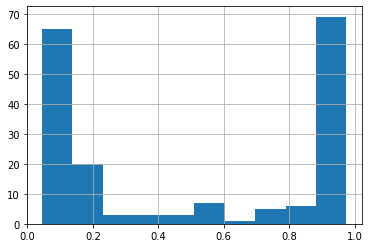

In [149]:
df['p'].hist()

In [150]:
modelo.coef_,modelo.intercept_

(array([[-3.90349651e-03,  4.05070188e-04,  4.05070188e-04,
         -9.12215306e-01, -3.41156369e-02, -2.97959813e-01,
          1.63462982e-01]]), array([4.38596831]))

In [151]:
import numpy as np

In [158]:
df['r_proba'] = pd.cut(df['p'],bins=np.arange(0,1.2,0.2),include_lowest=True).astype(str)

In [159]:
df.r_proba.value_counts(True)

(-0.001, 0.2]    0.456044
(0.8, 1.0]       0.406593
(0.4, 0.6]       0.054945
(0.2, 0.4]       0.043956
(0.6, 0.8]       0.038462
Name: r_proba, dtype: float64

In [160]:
df[['r_proba','y','v_mean_trip_total_sum_4']].to_excel('churn50_cubo.xlsx',index=False)

In [161]:
best_var

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X[best_var]),columns=best_var)

pca = PCA()

pca.fit(Xs)

pca.explained_variance_ratio_.cumsum()

Xp = pd.DataFrame(pca.transform(Xs),columns=['p%d'%(i+1) for i in range(7)])

Xp['y'] = y

import seaborn as sns

sns.lmplot(data=Xp,x='p1',y='p2',hue='y',fit_reg=False)



['v_mean_tips_sum_1',
 'v_total_trip_total_sum_1',
 'v_mean_trip_total_sum_1',
 'v_mean_dias_activo_1',
 'v_mean_dias_activo_2',
 'v_mean_dias_activo_3',
 'v_mean_dias_activo_4']